In [2]:
import pandas as pd
import numpy as np

# Dataset 1: Orders (messy!)
orders = pd.DataFrame({
    'order_id': [1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
                 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020,
                 1021, 1022, 1023, 1024, 1025],
    'customer_id': [101, 102, 103, 101, 104, 105, 102, 106, 103, 107,
                    101, 108, 109, 102, 104, 110, 103, 105, 111, 112,
                    101, 113, 114, 102, 115],
    'product_id': [501, 502, 503, 504, 501, 505, 502, 506, 503, 507,
                   504, 501, 508, 502, 505, 503, 506, 504, 507, 501,
                   508, 502, 505, 503, 506],
    'order_date': ['2024-10-05', '2024-10-12', '2024-10-18', 'invalid', '2024-11-02',
                   '2024-11-10', '2024-11-15', '2024-11-22', '2024-11-28', '2024-12-01',
                   '2024-12-05', '2024-12-10', '2024-12-12', '2024-12-15', '2024-12-18',
                   '2024-12-20', '2024-12-22', '2024-12-24', '2024-12-26', '2024-12-28',
                   '2024-12-29', '2024-12-30', '2024-12-30', '2024-12-31', '2024-12-31'],
    'quantity': ['2', '1', '3', '1', 'N/A', '2', '1', '4', '2', '1',
                 '3', '2', '1', '2', '3', '1', '2', '1', '3', '2',
                 '1', '2', '4', '1', '2'],
    'order_amount': [240, 150, 360, np.nan, 280, 200, 150, 400, 240, 180,
                     360, 240, 120, 300, 420, 120, 200, 120, 540, 240,
                     120, 300, 560, 120, 200]
})

# Dataset 2: Customers
customers = pd.DataFrame({
    'customer_id': [101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
                    111, 112, 113, 114, 115],
    'customer_name': ['  Alice Johnson  ', 'BOB SMITH', 'charlie brown', 'Alice Johnson',
                      'david LEE', 'Eve Wilson', 'Frank Miller', 'Grace Chen', 'Henry Taylor',
                      'Iris Wang', 'Jack Davis', 'Kate Martinez', 'Leo Garcia', 'Mia Lopez',
                      'Noah Kim'],
    'region': ['North', 'South', 'East', 'North', 'West', 'South', 'East', 'North',
               'West', 'South', 'East', 'North', 'West', 'South', 'East'],
    'signup_date': ['2023-01-15', '2023-03-20', '2023-05-10', '2023-01-15',
                    '2023-07-08', '2023-09-12', '2023-11-05', '2024-01-18',
                    '2024-03-22', '2024-05-14', '2024-06-30', '2024-07-15',
                    '2024-08-20', '2024-09-10', '2024-10-05']
})

# Dataset 3: Products
products = pd.DataFrame({
    'product_id': [501, 502, 503, 504, 505, 506, 507, 508],
    'product_name': ['Laptop Pro', 'Wireless Mouse', 'USB-C Cable', 'Gaming Keyboard',
                     'External SSD', 'Webcam HD', 'Monitor 27"', 'Headphones'],
    'category': ['computers', 'ACCESSORIES', 'accessories', 'Accessories',
                 'Storage', 'ACCESSORIES', 'Computers', 'accessories'],
    'price': ['1200', '50', '20', '120', '140', '80', '300', '60'],
    'stock': [15, 100, 200, 50, 30, 75, 20, 80]
})


orders.to_csv('orders_messy.csv', index=False)
customers.to_csv('customers_messy.csv', index=False)
products.to_csv('products_messy.csv', index=False)

print(" Messy datasets created!")
print("\nYour task: Clean and analyze this data!")

 Messy datasets created!

Your task: Clean and analyze this data!


In [3]:
orders['order_amount'].isnull()
orders['order_date'] = pd.to_datetime(orders['order_date'], errors='coerce')


In [4]:
orders_duplicates = (orders[orders.duplicated(keep=False)])
print(orders_duplicates)

Empty DataFrame
Columns: [order_id, customer_id, product_id, order_date, quantity, order_amount]
Index: []


In [5]:
customers['customer_name'] = customers['customer_name'].str.strip().str.title()
customers['region'] = customers['region'].str.lower()
customers['signup_date'] = pd.to_datetime(customers['signup_date'], errors='coerce')
customers_duplicates = (customers[customers.duplicated(keep=False)])

In [6]:
products['price'] = products['price'].astype(float)
products['category'] = products['category'].str.lower()
products['product_name'] = products['product_name'].astype(str)
products['product_name'] = products['product_name'].str.strip().str.title()


In [7]:
q4_orders = orders[(orders['order_date'] >= '2024-10-01') &
                         (orders['order_date'] <= '2024-12-31')].copy()
q4_orders['month'] = q4_orders['order_date'].dt.month
avg_order_by_month = ( q4_orders.groupby('month')['order_amount']).mean().sort_index()
print('Average Order By Months',avg_order_by_month)
q4_revenue = q4_orders['order_amount'].sum() #total revenue Q4
print('Total Q4 Revenue = ',q4_revenue)

Average Order By Months month
10    250.00
11    254.00
12    258.75
Name: order_amount, dtype: float64
Total Q4 Revenue =  6160.0


In [8]:
q4_signup = customers[(customers['signup_date'] >= '2024-10-01') & (customers['signup_date'] <= '2024-12-31')]
q4_new_cus = q4_signup['customer_id'].count()
print('New Customers signed up in Q4',q4_new_cus)


New Customers signed up in Q4 1


In [9]:
print("BUSINESS ANALYSIS - MOST Revenue generated by Region")
merge = pd.merge(orders, customers, on='customer_id', how='inner')
sales_by_region = merge.groupby('region')['order_amount'].sum()
print(sales_by_region)


BUSINESS ANALYSIS - MOST Revenue generated by Region
region
east     1720.0
north    1900.0
south    1800.0
west      740.0
Name: order_amount, dtype: float64


In [10]:
merge = pd.merge(orders, products, on='product_id', how='inner')
merge['quantity'] = pd.to_numeric(merge['quantity'], errors='coerce')
clean_qty = merge.dropna(subset=['quantity', 'product_name'])

top5_product = (
    clean_qty
        .groupby('product_name')['quantity']
        .sum()
        .sort_values(ascending=False)
        .head(5)
)

print(top5_product)

product_name
External Ssd      9.0
Webcam Hd         8.0
Usb-C Cable       7.0
Laptop Pro        6.0
Wireless Mouse    6.0
Name: quantity, dtype: float64


In [11]:
merge = pd.merge(orders, customers, on='customer_id', how='inner')
merge['order_amount'] = pd.to_numeric(merge['order_amount'], errors='coerce')
clean_amt = merge.dropna(subset=['order_amount'])
top_spent_cus = (clean_amt.groupby('customer_name')['order_amount'].sum().sort_values(ascending=False).head(1))
print(top_spent_cus)

customer_name
Alice Johnson    1420.0
Name: order_amount, dtype: float64


In [12]:
merge = pd.merge(orders, products, on='product_id', how='inner')
top_category = merge.groupby('category')['order_amount'].sum().sort_values(ascending=False).head(1)
print(top_category)

category
accessories    3260.0
Name: order_amount, dtype: float64


In [13]:
monthly_revenue = (q4_orders
                   .groupby('month')['order_amount']
                   .sum()
                   .sort_index())

print(monthly_revenue)
oct_rev = monthly_revenue[10]
nov_rev = monthly_revenue[11]
dec_rev = monthly_revenue[12]

oct_to_nov_growth = ((nov_rev - oct_rev) / oct_rev) * 100
nov_to_dec_growth = ((dec_rev - nov_rev) / nov_rev) * 100

print(f"Oct→Nov Growth: {oct_to_nov_growth:.2f}%")
print(f"Nov→Dec Growth: {nov_to_dec_growth:.2f}%")

month
10     750.0
11    1270.0
12    4140.0
Name: order_amount, dtype: float64
Oct→Nov Growth: 69.33%
Nov→Dec Growth: 225.98%


In [14]:

orders_per_customer = (q4_orders
                       .groupby('customer_id')['order_id']
                       .count())


frequent_customers = orders_per_customer[orders_per_customer >= 3]

print(f"Customers with 3+ orders: {len(frequent_customers)}")
print("\nCustomer IDs and their order counts:")
print(frequent_customers)


Customers with 3+ orders: 3

Customer IDs and their order counts:
customer_id
101    3
102    4
103    3
Name: order_id, dtype: int64


In [15]:
q4_orders['day_of_week'] = q4_orders['order_date'].dt.day_name()
avg_by_day = (q4_orders.groupby('day_of_week')['order_amount'].mean().sort_values(ascending=False))
print("Average Order Value by Day of Week:")
print(avg_by_day)
print(f"\nHighest day: {avg_by_day.idxmax()} (${avg_by_day.max():.2f})")

Average Order Value by Day of Week:
day_of_week
Monday       430.0
Wednesday    420.0
Thursday     315.0
Friday       257.5
Saturday     227.5
Sunday       200.0
Tuesday      170.0
Name: order_amount, dtype: float64

Highest day: Monday ($430.00)


Revenue by Region:
region
north    1900.0
south    1800.0
east     1720.0
west      740.0
Name: order_amount, dtype: float64


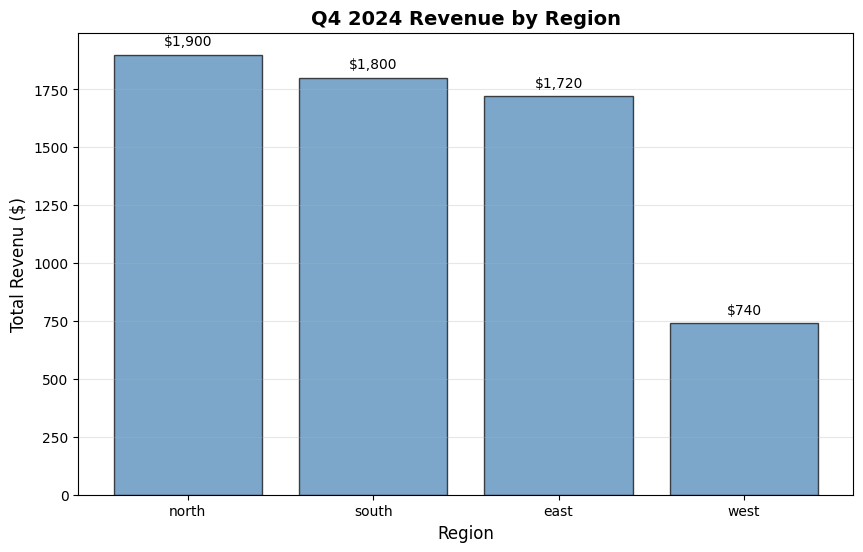


 Chart saved as: revenue_by_region.png


In [27]:
import matplotlib.pyplot as plt

merged_data = pd.merge(orders, customers, on='customer_id', how='inner')
revenue_by_region = merged_data.groupby('region')['order_amount'].sum().sort_values(ascending=False)
print("Revenue by Region:")
print(revenue_by_region)
plt.figure(figsize=(10,6))
plt.bar(revenue_by_region.index, revenue_by_region.values,
        color='steelblue',
        edgecolor='black',
        alpha=0.7)
plt.xlabel('Region',fontsize=12)
plt.ylabel('Total Revenu ($)', fontsize=12)
plt.title('Q4 2024 Revenue by Region', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(revenue_by_region.values):
    plt.text(i, v + 40, f'${v:,.0f}', ha='center', fontsize=10)

# Save the chart
plt.savefig('revenue_by_region.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n Chart saved as: revenue_by_region.png")

Monthly Revenue:
month
10.0     750.0
11.0    1270.0
12.0    4140.0
Name: order_amount, dtype: float64


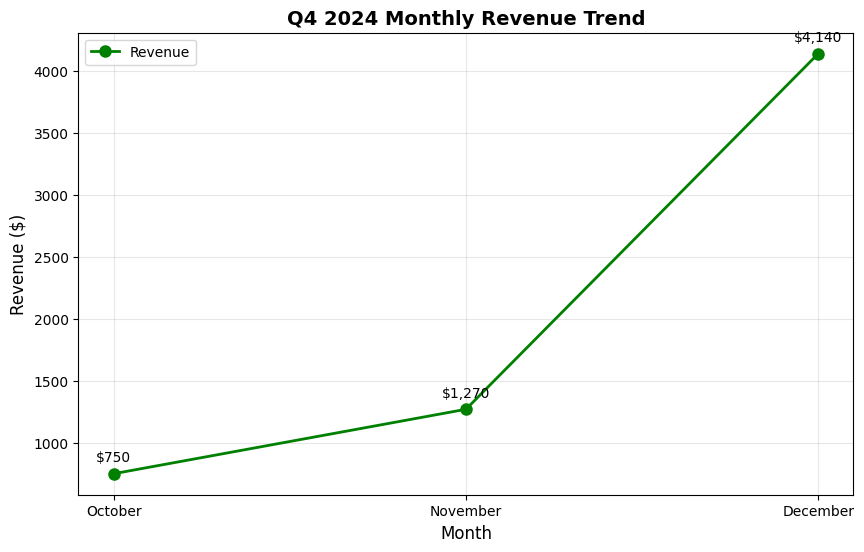


✅ Chart saved as: monthly_revenue_trend.png


In [33]:
# Chart 2: Monthly Revenue Trend (Line Chart)

# Extract month from order_date
merged_data['month'] = merged_data['order_date'].dt.month

# Group by month and sum revenue
monthly_revenue = merged_data.groupby('month')['order_amount'].sum().sort_index()

print("Monthly Revenue:")
print(monthly_revenue)

# Create line chart
plt.figure(figsize=(10, 6))
plt.plot(monthly_revenue.index, monthly_revenue.values, 
         marker='o', 
         color='green', 
         linewidth=2, 
         markersize=8,
         label='Revenue')

plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.title('Q4 2024 Monthly Revenue Trend', fontsize=14, fontweight='bold')
plt.xticks([10, 11, 12], ['October', 'November', 'December'])  # Better labels
plt.grid(True, alpha=0.3)
plt.legend()

# Add value labels on points
for i, v in enumerate(monthly_revenue.values):
    plt.text(monthly_revenue.index[i], v + 100, f'${v:,.0f}', 
             ha='center', fontsize=10)

# Save chart
plt.savefig('monthly_revenue_trend.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Chart saved as: monthly_revenue_trend.png")

Top 5 Products by Quantity:
product_name
External Ssd      9.0
Webcam Hd         8.0
Usb-C Cable       7.0
Laptop Pro        6.0
Wireless Mouse    6.0
Name: quantity, dtype: float64


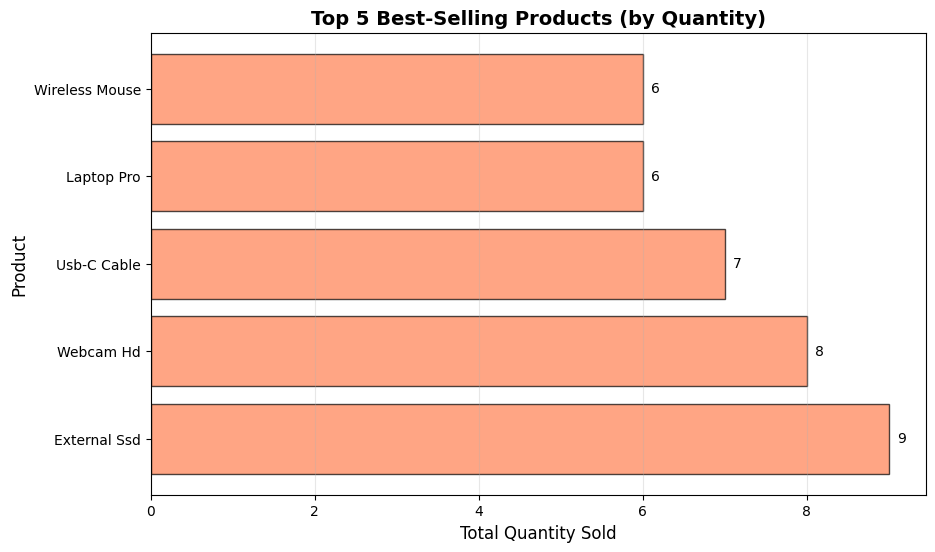


✅ Chart saved as: top5_products_quantity.png


In [41]:
# Chart 3: Top 5 Products by Quantity Sold (Horizontal Bar Chart)

# Merge orders with products to get product names
orders_products = pd.merge(merged_data, products, on='product_id', how='inner')

# Convert quantity to numeric (in case it's still string)
orders_products['quantity'] = pd.to_numeric(orders_products['quantity'], errors='coerce')

# Group by product name and sum quantities
product_quantities = orders_products.groupby('product_name')['quantity'].sum().sort_values(ascending=False)

# Get top 5
top5_products = product_quantities.head(5)

print("Top 5 Products by Quantity:")
print(top5_products)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top5_products.index, top5_products.values, 
         color='coral', 
         edgecolor='black', 
         alpha=0.7)

plt.xlabel('Total Quantity Sold', fontsize=12)
plt.ylabel('Product', fontsize=12)
plt.title('Top 5 Best-Selling Products (by Quantity)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(top5_products.values):
    plt.text(v+0.1, i, f'{int(v)}', va='center', fontsize=10)

# Save chart
plt.savefig('top5_products_quantity.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Chart saved as: top5_products_quantity.png")

Revenue by Category:
category
accessories    3260.0
computers      1720.0
storage        1180.0
Name: order_amount, dtype: float64


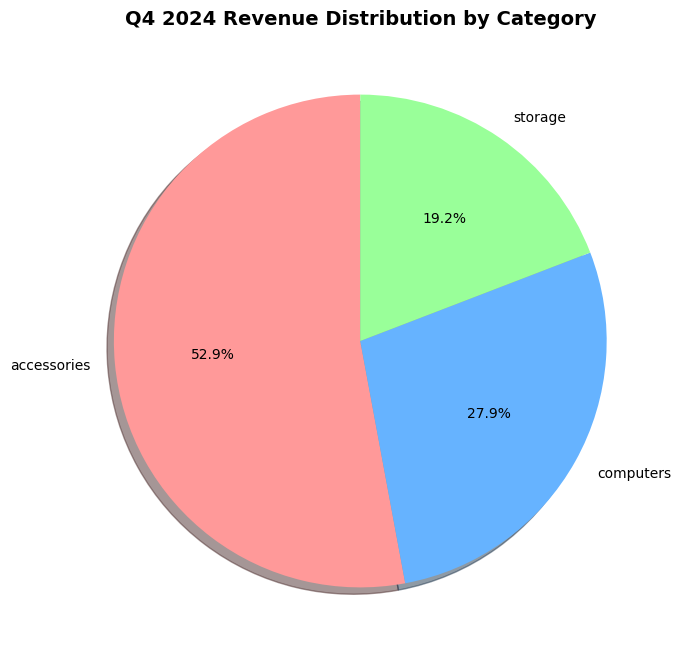


✅ Chart saved as: revenue_by_category.png


In [42]:
# Chart 4: Revenue by Product Category (Pie Chart)

# Group by category and sum revenue
category_revenue = orders_products.groupby('category')['order_amount'].sum().sort_values(ascending=False)

print("Revenue by Category:")
print(category_revenue)

# Create pie chart
plt.figure(figsize=(8, 8))

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc']

plt.pie(category_revenue.values,
        labels=category_revenue.index,
        autopct='%1.1f%%',
        colors=colors[:len(category_revenue)],  # Use only needed colors
        startangle=90,
        shadow=True)

plt.title('Q4 2024 Revenue Distribution by Category', fontsize=14, fontweight='bold')

# Save chart
plt.savefig('revenue_by_category.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Chart saved as: revenue_by_category.png")

Customer Spending Statistics:
Mean spending: $410.67
Median spending: $320.00
Min spending: $120.00
Max spending: $800.00


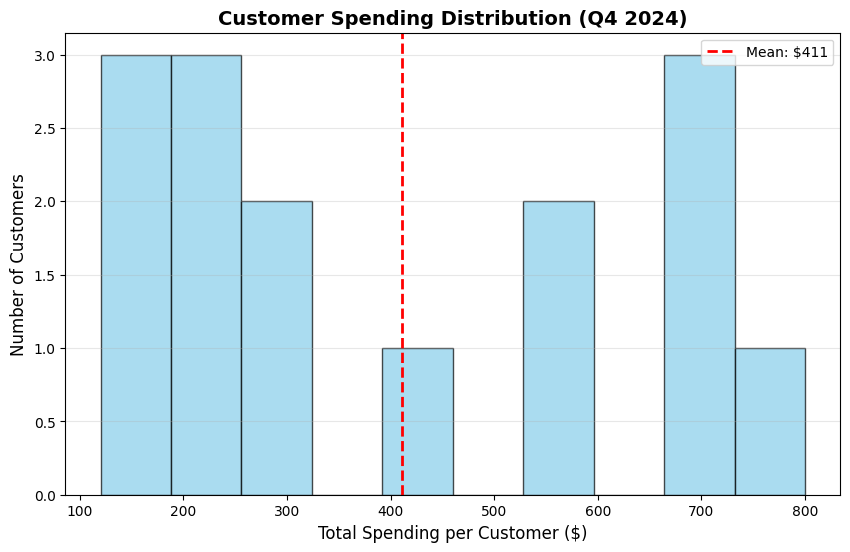


✅ Chart saved as: customer_spending_distribution.png


In [43]:
# Chart 5: Customer Spending Distribution (Histogram)

# Calculate total spending per customer
customer_spending = merged_data.groupby('customer_id')['order_amount'].sum()

print("Customer Spending Statistics:")
print(f"Mean spending: ${customer_spending.mean():,.2f}")
print(f"Median spending: ${customer_spending.median():,.2f}")
print(f"Min spending: ${customer_spending.min():,.2f}")
print(f"Max spending: ${customer_spending.max():,.2f}")

# Create histogram
plt.figure(figsize=(10, 6))

plt.hist(customer_spending.values, 
         bins=10, 
         color='skyblue', 
         edgecolor='black', 
         alpha=0.7)

# Add mean line
mean_spending = customer_spending.mean()
plt.axvline(mean_spending, color='red', linestyle='--', linewidth=2, 
            label=f'Mean: ${mean_spending:,.0f}')

plt.xlabel('Total Spending per Customer ($)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Customer Spending Distribution (Q4 2024)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(axis='y', alpha=0.3)

# Save chart
plt.savefig('customer_spending_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✅ Chart saved as: customer_spending_distribution.png")